In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-robi/synthetic_telecom_dataset_with_targets_1.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/kaggle/input/telecom-robi/synthetic_telecom_dataset_with_targets_1.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,User_Satisfaction_Index,Signal_Strength,Interference_Level,TotalCharges,Fault_Type,Severity_Level,Failure,Renewal,Adoption,Churn
0,1,CUST000001,Male,1,Yes,No,11,No,No phone service,Fiber optic,...,4.719952,-71.094484,27.222404,638.80,Hardware,Major,0,0,1,0
1,2,CUST000002,Female,1,No,No,10,No,No phone service,Fiber optic,...,6.263826,-106.592083,4.359065,401.89,Network,Minor,0,0,1,0
2,3,CUST000003,Male,1,No,No,59,No,Yes,No,...,2.538021,-119.378371,97.497165,3008.94,Network,Critical,1,1,1,1
3,4,CUST000004,Male,1,No,No,54,No,No,Fiber optic,...,3.605674,-76.389195,26.616310,1556.91,Hardware,Critical,1,1,0,0
4,5,CUST000005,Male,1,Yes,Yes,58,No,Yes,No,...,8.744727,-117.513146,4.887457,3697.86,Software,Minor,0,1,1,0


In [4]:
features = ['MonthlyCharges', 'TotalCharges', 'InternetService', 
            'StreamingTV', 'StreamingMovies', 'User_Satisfaction_Index', 'tenure']
data = df[features]
data

,MonthlyCharges,TotalCharges,InternetService,StreamingTV,StreamingMovies,User_Satisfaction_Index,tenure
0,58.072497,638.80,Fiber optic,No,No,4.719952,11
1,40.189423,401.89,Fiber optic,Yes,No,6.263826,10
2,50.998904,3008.94,No,Yes,No,2.538021,59
3,28.831636,1556.91,Fiber optic,No internet service,No,3.605674,54
4,63.756221,3697.86,No,No,Yes,8.744727,58
...,...,...,...,...,...,...,...
402542,106.693223,1493.71,No,No internet service,No internet service,0.460423,14
402543,104.850741,1992.16,DSL,Yes,No,6.132380,19
402544,35.862720,681.39,No,No internet service,No internet service,1.383901,19
402545,97.644997,6737.50,No,No internet service,No internet service,9.134676,69


In [5]:
data = data.dropna()

In [6]:
categorical_features = ['InternetService', 'StreamingTV', 'StreamingMovies']
label_encoder = LabelEncoder()

for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

In [7]:
data

,MonthlyCharges,TotalCharges,InternetService,StreamingTV,StreamingMovies,User_Satisfaction_Index,tenure
0,58.072497,638.80,1,0,0,4.719952,11
1,40.189423,401.89,1,2,0,6.263826,10
2,50.998904,3008.94,2,2,0,2.538021,59
3,28.831636,1556.91,1,1,0,3.605674,54
4,63.756221,3697.86,2,0,2,8.744727,58
...,...,...,...,...,...,...,...
402542,106.693223,1493.71,2,1,1,0.460423,14
402543,104.850741,1992.16,0,2,0,6.132380,19
402544,35.862720,681.39,2,1,1,1.383901,19
402545,97.644997,6737.50,2,1,1,9.134676,69


In [8]:
data = data.astype(float)

In [9]:
data

,MonthlyCharges,TotalCharges,InternetService,StreamingTV,StreamingMovies,User_Satisfaction_Index,tenure
0,58.072497,638.80,1.0,0.0,0.0,4.719952,11.0
1,40.189423,401.89,1.0,2.0,0.0,6.263826,10.0
2,50.998904,3008.94,2.0,2.0,0.0,2.538021,59.0
3,28.831636,1556.91,1.0,1.0,0.0,3.605674,54.0
4,63.756221,3697.86,2.0,0.0,2.0,8.744727,58.0
...,...,...,...,...,...,...,...
402542,106.693223,1493.71,2.0,1.0,1.0,0.460423,14.0
402543,104.850741,1992.16,0.0,2.0,0.0,6.132380,19.0
402544,35.862720,681.39,2.0,1.0,1.0,1.383901,19.0
402545,97.644997,6737.50,2.0,1.0,1.0,9.134676,69.0


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
# Step 1: Find the optimal number of clusters using silhouette score
silhouette_scores = []
range_clusters = range(2, 11)  # Test clusters from 2 to 10

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

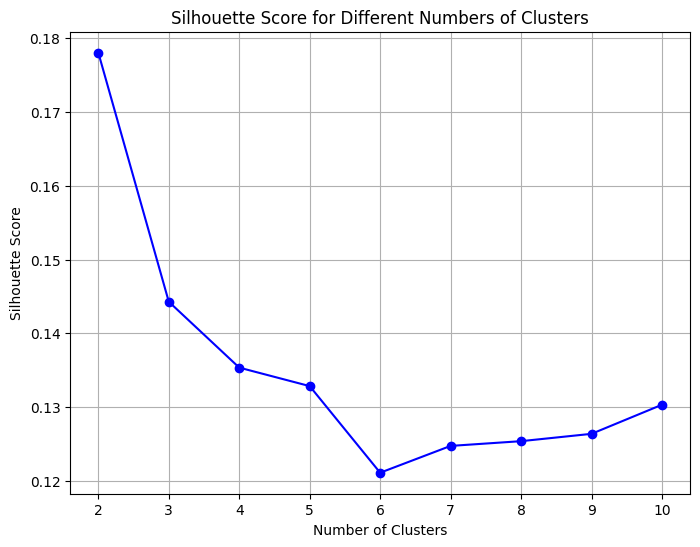

In [12]:
# Plot silhouette scores to identify the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', color='b')
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [13]:
# The optimal number of clusters is where the silhouette score is maximized
optimal_clusters = range_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_clusters}")

Optimal Number of Clusters: 2


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


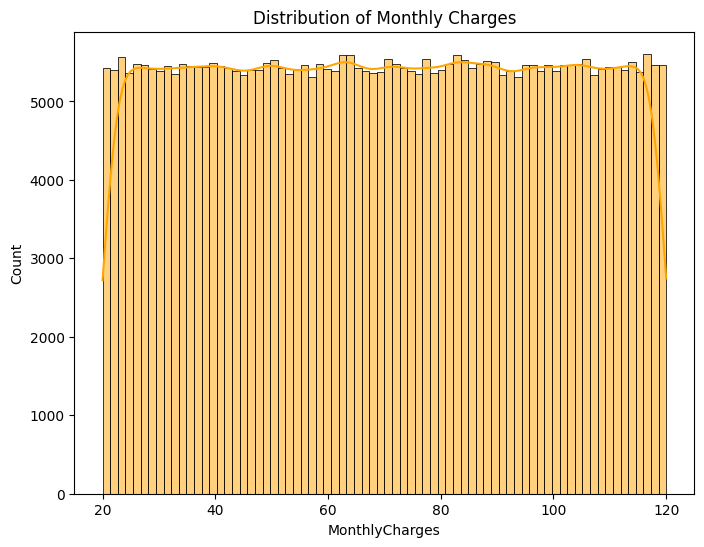

In [14]:
# Step 2: Perform EDA
# Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], kde=True, color='orange')
plt.title('Distribution of Monthly Charges')
plt.show()

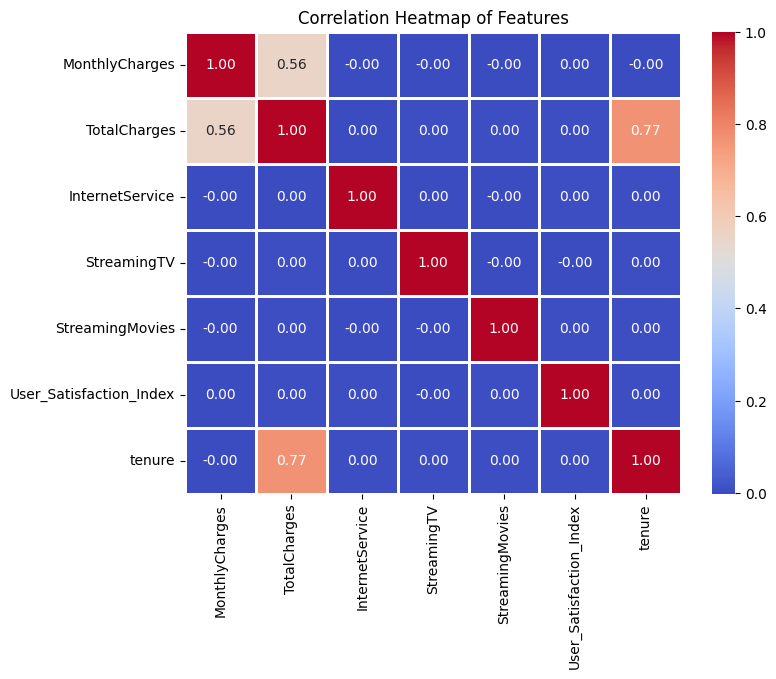

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Features')
plt.show()

In [16]:
# Step 3: Apply Clustering Algorithm (KMeans) with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Step 4: Visualize the clusters after dimensionality reduction (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

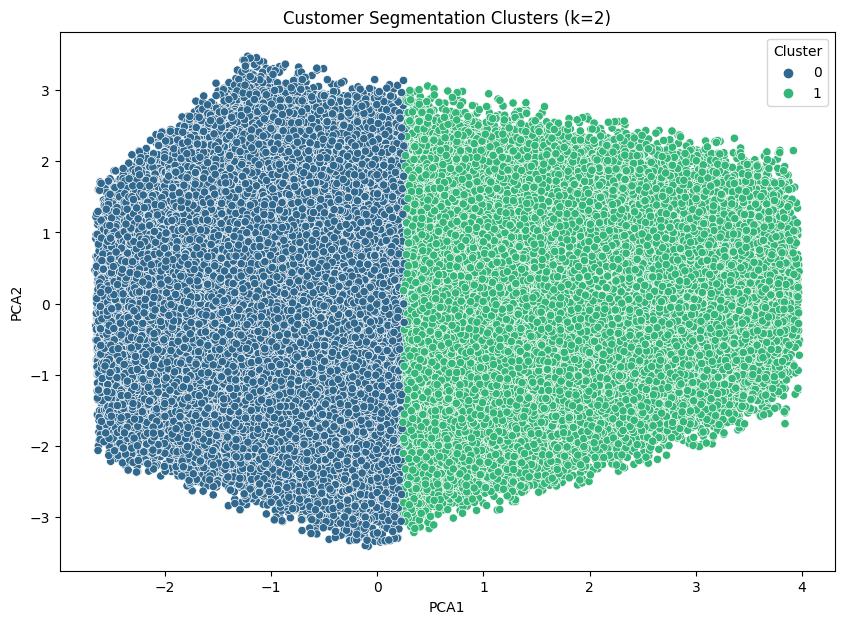

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title(f'Customer Segmentation Clusters (k={optimal_clusters})')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

In [19]:
# Save the updated dataset with cluster labels
df.to_csv("segmented_customers_with_clusters.csv", index=False)